## Pandas Expanding and Rolling

21 판다스 Expanding and Rolling 이해하기. DrWill양진욱 Youtube

Expanding
- 요약 기능을 허용하는 확장 개체를 누적 적용하여 반환
    - 확장된 변형 제공
- 누적된 변경된 값의 정보 제공
- 누적된 값을 적용할 건데 변환된 값을 나타냄!

Rolling
- 요약 기능을 허용하는 Rolling 객체를 길이 n개의 창에 적용하여 반환
- 이동 평균(Moving Average)을 구할 때 사용
- 차분(window)을 구해서 어떤 변화된 값을 나타낼 때

The rolling() and expanding() functions can be used directly from DataFrame Groupby objects

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

<AxesSubplot:>

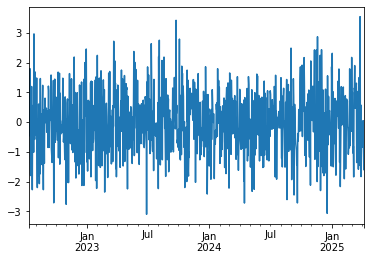

In [3]:
s = pd.Series(np.random.randn(1000),
             index=pd.date_range('7/12/2022', periods=1000))

s
s.plot()

<AxesSubplot:>

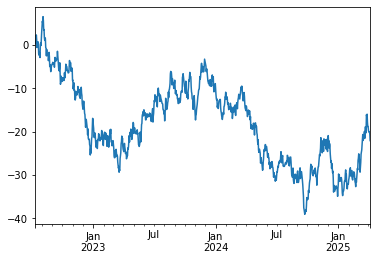

In [4]:
s = s.cumsum() # 누적 합
s.plot()

In [5]:
# rolling : 이동평균 구할 때 사용
r = s.rolling(window=30)
r
# window : size of moving window
# 30개씩 끊어서 보겠다
# 종가 같은데 많이 사용

Rolling [window=30,center=False,axis=0,method=single]

In [6]:
r.mean()

2022-07-12          NaN
2022-07-13          NaN
2022-07-14          NaN
2022-07-15          NaN
2022-07-16          NaN
                ...    
2025-04-02   -21.813840
2025-04-03   -21.630401
2025-04-04   -21.410561
2025-04-05   -21.176576
2025-04-06   -20.934379
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

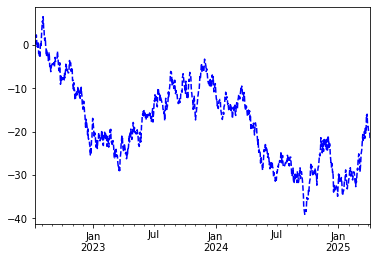

In [7]:
# 이동평균
s.plot(style='b--')

<AxesSubplot:>

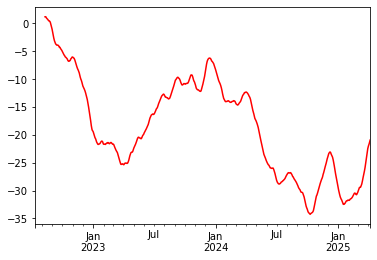

In [8]:
# 이동평균
r.mean().plot(style='r')

<AxesSubplot:>

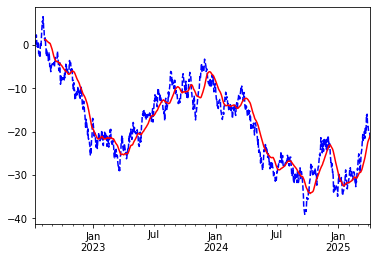

In [9]:
# 이동평균
# 겹쳐서
s.plot(style='b--')
r.mean().plot(style='r')

In [23]:
# expanding
df = pd.DataFrame(np.random.randn(1000,4),
                 index=pd.date_range('7/12/2022', periods=1000),
                 columns=['A','B','C','D'])

In [24]:
df = df.cumsum()
df

,A,B,C,D
2022-07-12,-0.390336,-2.002710,-0.730788,1.120832
2022-07-13,-0.155371,-0.417314,-1.095230,2.544369
2022-07-14,-1.273038,-1.197301,0.164037,1.229314
2022-07-15,-0.713550,-0.999711,0.108829,0.138428
2022-07-16,-1.480705,-0.597602,-0.768247,0.377934
...,...,...,...,...
2025-04-02,15.417509,-10.390744,-9.339405,-7.290672
2025-04-03,15.529610,-8.956629,-8.712036,-7.961164
2025-04-04,15.414692,-10.052282,-7.725063,-8.260118
2025-04-05,16.255432,-11.318362,-6.389511,-8.828003


<AxesSubplot:>

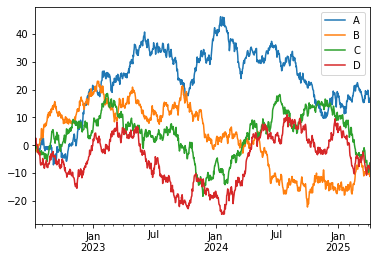

In [25]:
df.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

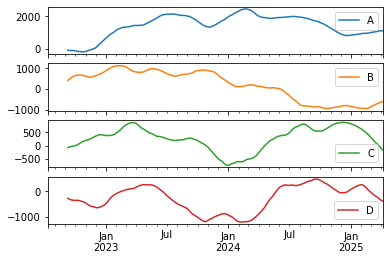

In [27]:
df.rolling(window=60).sum().plot(subplots=True)

<AxesSubplot:>

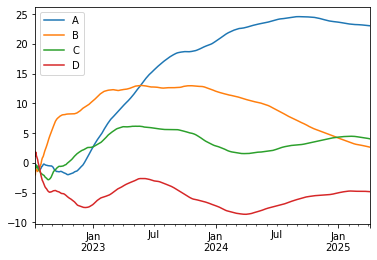

In [28]:
df.rolling(window=len(df), min_periods=1).mean().plot()
# min_periods : int, default 1
# Minimum number of observations in window required to have a value

In [29]:
df.expanding?
# Provide expanding transformations(확장된 변형 제공)
# 누적된 변경된 값의 정보 제공

In [30]:
df.expanding(min_periods=1).mean()

,A,B,C,D
2022-07-12,-0.390336,-2.002710,-0.730788,1.120832
2022-07-13,-0.272853,-1.210012,-0.913009,1.832600
2022-07-14,-0.606248,-1.205775,-0.553994,1.631505
2022-07-15,-0.633074,-1.154259,-0.388288,1.258236
2022-07-16,-0.802600,-1.042928,-0.464280,1.082175
...,...,...,...,...
2025-04-02,23.080011,2.687843,4.080248,-4.828916
2025-04-03,23.072438,2.676163,4.067417,-4.832057
2025-04-04,23.064765,2.663409,4.055601,-4.835492
2025-04-05,23.057949,2.649414,4.045146,-4.839489


<AxesSubplot:>

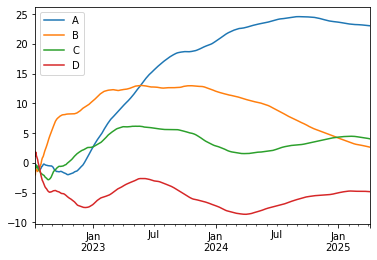

In [31]:
df.expanding(min_periods=1).mean().plot()

In [32]:
dfe = pd.DataFrame({'B':[0, 1, 2, np.nan, 4]})
dfe

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


<AxesSubplot:>

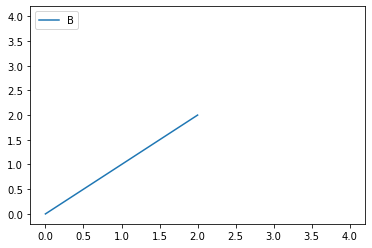

In [33]:
dfe.plot()

In [34]:
dfe.expanding(2).sum() # 누적합

,B
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


<AxesSubplot:>

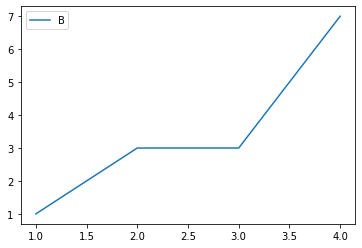

In [35]:
dfe.expanding(2).sum().plot()

<AxesSubplot:>

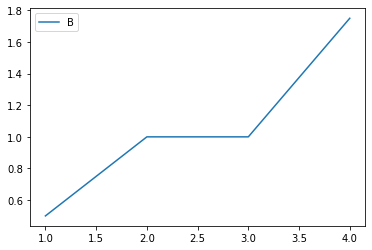

In [36]:
dfe.expanding(2).mean().plot()